# DS 675-003 - GROUP PROJECT: TEXT CLASSIFICATION FOR MENTAL HEALTH



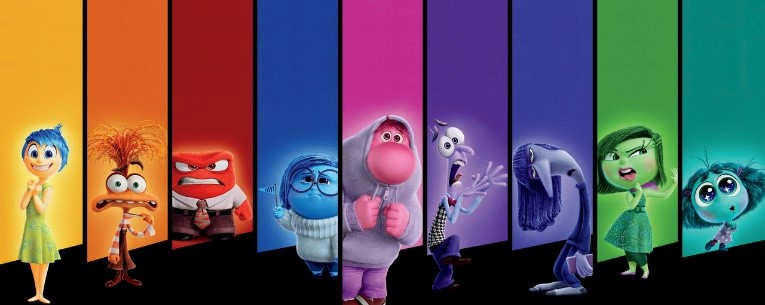

*Explanation:*
>
**Project Overview:**
>
  In this project, we perform sentiment analysis on textual data to predict the mental health status of individuals based on their statements. By analyzing the language used in these statements, we aim to accurately classify them into one of seven mental health categories: Normal, Depression, Suicidal, Anxiety, Stress, Bi-Polar, and Personality Disorder.

>
  The dataset includes text posts from online platforms like Reddit or
  Twitter, each labeled with mental health statuses such as: Normal, Depression, Suicidal, Anxiety, Stress,
  Bi-Polar, and Personality Disorder. The data structure is organized as follows:
  1. unique_id: A unique identifier for each post.
  2. Statement: The actual text or post from the individual.
  3. Mental Health Status: The corresponding mental health label (e.g., Depression, Anxiety)



----------------

*Explanation:*
>
**Main Issues:**
>
The analysis deals with the following mental health issues:
  - Anxiety: Feeling of worry, nervousness, or unease.
  - Normal: State of mental well-being without specific issues.
  - Depression: Persistent feelings of sadness and loss of interest.
  - Suicidal: Thoughts or actions related to self-harm or ending one's life.
  - Stress: Mental or emotional strain resulting from adverse or demanding circumstances.
  - Bipolar: Mood disorder characterized by extreme highs and lows.
  - Personality Disorder: Patterns of behavior that deviate from cultural expectations, causing distress or impairment.
----------------

*Explanation:*
>
**Methodologies Used:**
>
1. Data Preparation:
  - Load Data: Import the dataset containing mental health-related texts and labels.
  - Clean Data: Handle missing values, remove unnecessary columns, and preprocess text.

2. Text Preprocessing
  - Tokenization: Split text into words or tokens.
  - Stemming: Apply Porter Stemmer to reduce words to their root form.
  - Vectorization: Convert text data into numerical vectors using TfidfVectorizer.
  
3. Data Splitting
  - Train-Test Split: Divide the dataset into training and testing sets.

4. Model Training
  - Train Models: Use classifiers like RandomForest, Neural Net, and Logistic Regression to train the models on the training data.

5. Model Evaluation & Inference
  - Evaluate Performance: Use metrics such as f1-score, Confusion Matrix, AUC-ROC to assess model performance.
  - SHAP Values to provide insights into how individual features contribute to a model's predictions


6. Save the Model
  - Use Joblib to save the trained models for future use.

----------------

**Libraries Used:**
>
To implement the sentiment analysis, the following libraries are utilized:

  - Pandas: For data manipulation and analysis.
  - NumPy: For numerical operations and handling arrays.
  - Seaborn: For statistical data visualization.
  - Matplotlib: For plotting graphs and visualizations.
  - Scikit-learn: For machine learning algorithms and model evaluation.
  - TfidfVectorizer: For converting text data into numerical vectors.
  - RandomForestClassifier: For classification tasks using a forest of decision trees.
  - Tensorflow: For Neural Net Model.
  - DecisionTreeClassifier: For classification using decision trees.
  - LogisticRegression: For classification using logistic function tasks.
  - NLTK: For natural language processing tasks, including stemming.
  - PorterStemmer: For reducing words to their root form.
  - Joblib: For saving and loading models.

----------------

# 0. Setup Environment

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install imblearn
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

import nltk
from nltk.stem import PorterStemmer
import shap

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

import seaborn as sn
import matplotlib.pyplot as plt
import joblib as j

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DS 675  - Project/Sentiment Analysis for Mental Health.csv', index_col=0)

Mounted at /content/drive


---------

*Explanation:*
>
**Loading the Data:**
>
The dataset is loaded, and for Initial Inspection: We print sample few rows of the dataset are displayed to get a quick overview of the data.

---------

# 1. Exploratory Data Analysis


In [ ]:
df.sample(10)

,statement,status
16967,I turn 26 today. And I have just had enough. I...,Suicidal
8518,there is a plethora of ways I could kill mysel...,Suicidal
50160,How to live like this I’m just very lost right...,Bipolar
40524,ha main depression main tun tuna bajata hu htt...,Depression
43970,coffee amp carrot cake slice mmm still lost fo...,Normal
35752,Health anxiety is ruining my life. I don’t kno...,Anxiety
38304,during my therapy session today my therapist m...,Depression
20872,i am planning on committing suicide for the si...,Suicidal
32898,i like this hotel.,Normal
3633,"In the morning, I want to talk to a foreign dog",Normal


---------

*Explanation:*
>

Data Summary: The info() method is used to get a summary of the DataFrame.
  - RangeIndex: The DataFrame has 53,043 entries.
  - Columns: There are 2 columns: statement and status.
  - Non-null Counts:
    - statement: 52,681 non-null values
    - status: 53,043 non-null values
  - Data Types: Both columns are of object type.
  - Memory Usage: The DataFrame uses approximately 828.9 KB of memory.

---------

In [ ]:
print("df info:")
df.info()

print("")
print("df shape:")
df.shape

df info:
<class 'pandas.core.frame.DataFrame'>
Index: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB

df shape:


(53043, 2)

In [ ]:
df['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


------

*Explanation:*
>
A count plot is created to visualize the number respective statuses.
Plot Details:
- Y-axis: Mental health condition Status or Category
- X-axis: Total Number of Status

-------

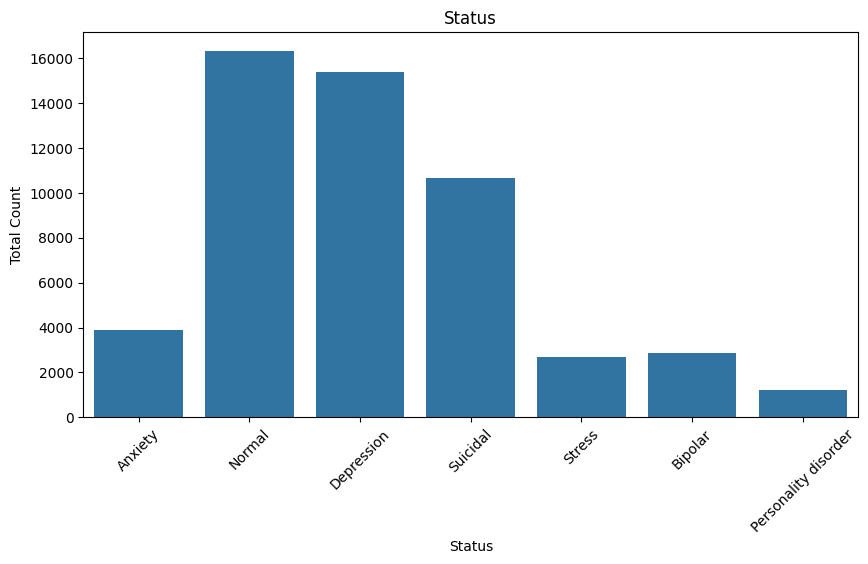

In [ ]:
plt.figure(figsize=(10,5))
sn.countplot(x=df['status'])
plt.ylabel("Total Count")
plt.xlabel("Status")
plt.title("Status")
plt.xticks(rotation=45)
plt.show()

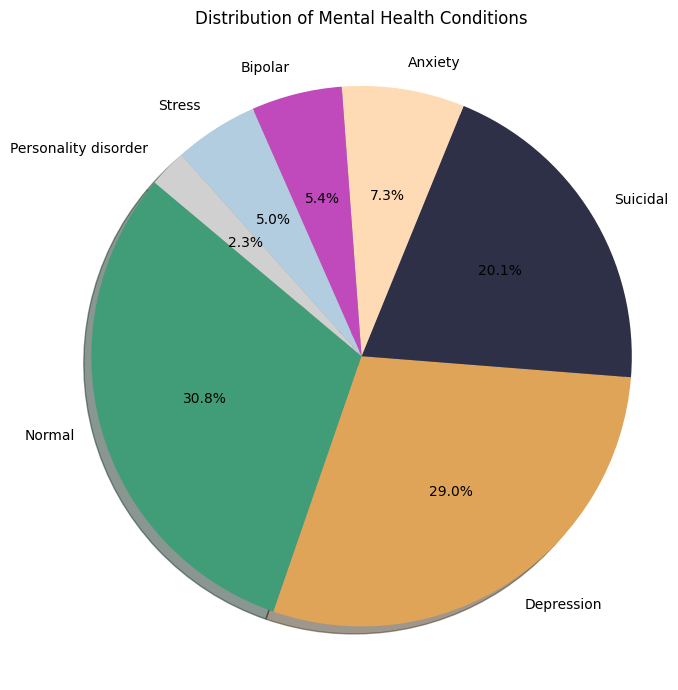

In [ ]:
# Count the occurrences of each category
status_counts = df['status'].value_counts()

# Define colors for each category (7 colors)
colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()

-------

*Explanation:*
>
The target variable in our dataset is unbalanced. This imbalance could affect our model's performance, so we'll need to address it later to ensure accurate and fair predictions.

-------

-------
**Feature Engineering:**
>
> *We try to add new features (num_of_characters and num_of_sentences), since we have several lengthy messages, most of which might express suicidal thoughts or signs of depression.*

-------


In [ ]:
# Calculate the number of characters and sentences
df['num_of_characters'] = df['statement'].str.len()
df['num_of_words'] = df['statement'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nltk.sent_tokenize(x)) if pd.notna(x) else 0)

# Generate descriptive statistics
description = df[['num_of_characters', 'num_of_words', 'num_of_sentences']].describe()

# Display the descriptive statistics
print(description)

       num_of_characters  num_of_words  num_of_sentences
count       52681.000000  53043.000000      53043.000000
mean          578.713863    112.386460          6.237355
std           846.269078    163.441356         10.664394
min             2.000000      0.000000          0.000000
25%            80.000000     15.000000          1.000000
50%           317.000000     61.000000          3.000000
75%           752.000000    147.500000          8.000000
max         32759.000000   6300.000000       1260.000000


                   num_of_characters  num_of_words  num_of_sentences  \
num_of_characters           1.000000      0.989044          0.783657   
num_of_words                0.989044      1.000000          0.783908   
num_of_sentences            0.783657      0.783908          1.000000   
encoded_status             -0.033808     -0.025619          0.010665   

                   encoded_status  
num_of_characters       -0.033808  
num_of_words            -0.025619  
num_of_sentences         0.010665  
encoded_status           1.000000  


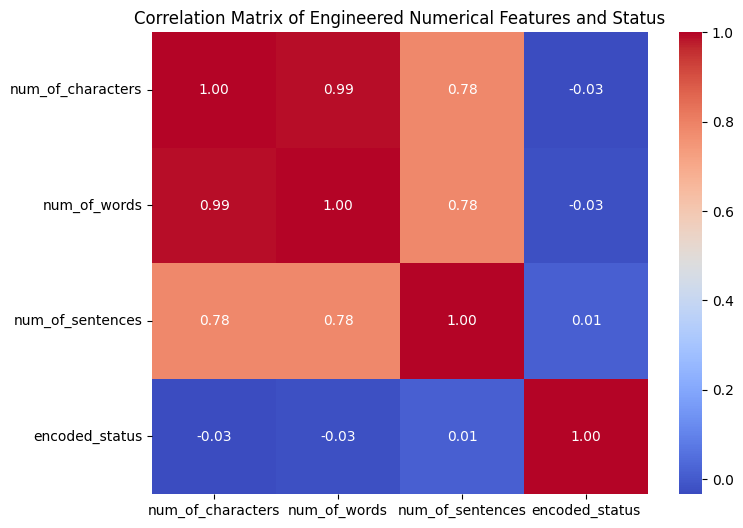

In [ ]:
lbl_encoder = LabelEncoder()
df['encoded_status'] = lbl_encoder.fit_transform(df['status'])

numerical_features = ['num_of_characters', 'num_of_words', 'num_of_sentences', 'encoded_status']
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Engineered Numerical Features and Status')
plt.show()

df = df.drop(columns=['num_of_characters', 'num_of_words', 'num_of_sentences', 'encoded_status'])

------

*Explanation:*
>
The correlation matrix (heatmap) shows weak correlation of engineered numerical features with the target variable (status), indicating that they may not be strong predictors on their own.We decided not to combine these engineered features with text-based features (e.g., TF-IDF) in model training.

-------



# 2. Pre-processing steps

-------

*Explanation:*
>
**Handling Missing Values**
>
- Missing Values Count: The count of missing values in each column is displayed.
  - statement: 362 missing values
  - status: 0 missing values

- Dropping Missing Values: Rows with missing values in the statement column are dropped.
  - Shape Before: (53,043, 2)
  - Shape After: (52,681, 2)

-------

### 2.1 drop na

In [ ]:
df.isna().sum()

,0
statement,362
status,0


In [ ]:
df.dropna(inplace=True)

print("df shape:")
df.shape

df shape:


(52681, 2)

### 2.2 Resampling (handle class imbalance)

-------

*Explanation:*
>
**Resampling the Data:**
>
- Max Count Calculation 📏: The maximum count of instances in any category is calculated.
  - Result: The maximum count is 16,343.
- Resampling Function 🛠️: A function resmpl() is defined to handle the resampling process.
  - Goal: Ensure each category has the same number of instances (16,343).
  - Process:
For each status category, if the number of instances is less than the max count, instances are resampled with replacement until they reach the max count.
If the category already has instances equal to the max count, they are left unchanged.
- Resampled Data 📈: The DataFrame is updated with the resampled data.

-------


In [ ]:
max_count=df['status'].value_counts().max()
max_count

16343

In [ ]:
def resmpl(df):
    max_count = df['status'].value_counts().max()

    df_resampled = pd.DataFrame()

    for status in df['status'].unique():
        df_class = df[df['status'] == status]
        if len(df_class) < max_count:
            df_class_resampled = resample(df_class,
                                          replace=True,
                                          n_samples=max_count,
                                          random_state=42)
            df_resampled = pd.concat([df_resampled, df_class_resampled])
        else:
            df_resampled = pd.concat([df_resampled, df_class])

    return df_resampled


df_resampled = resmpl(df)

-------

*Explanation:*
>
**🔍 Checking Resampled Data:**
>
- Value Counts 🔢: The distribution of each status category is checked.
  - Result: Each status now has 16,343 instances.
- Shape of Data 🔄: The shape of the DataFrame is checked.
  - Result: The DataFrame now has 114,401 rows and 2 columns.

-------




In [ ]:
print(df_resampled.status.value_counts())

print("")
print("df shape:")
df.shape

status
Anxiety                 16343
Normal                  16343
Depression              16343
Suicidal                16343
Stress                  16343
Bipolar                 16343
Personality disorder    16343
Name: count, dtype: int64

df shape:


(52681, 2)

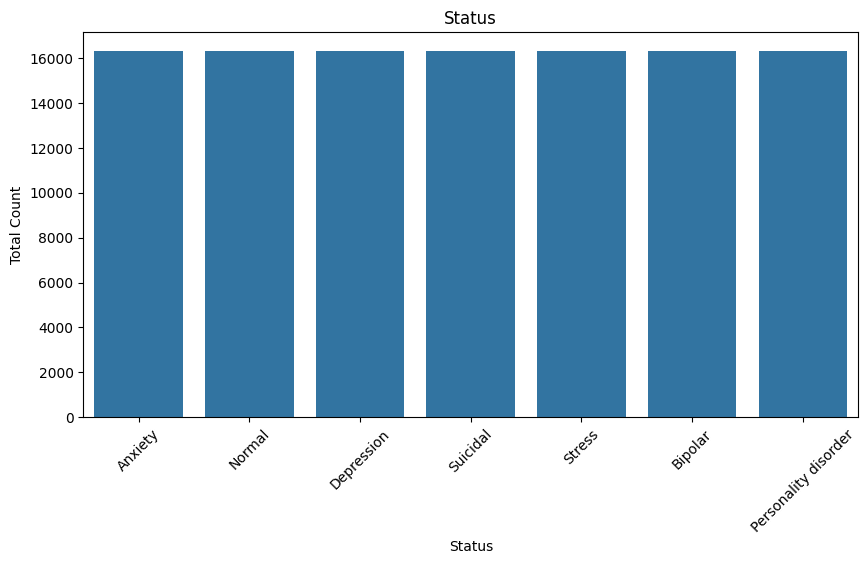

In [ ]:
plt.figure(figsize=(10,5))
sn.countplot(x=df_resampled['status'])
plt.ylabel("Total Count")
plt.xlabel("Status")
plt.title("Status")
plt.xticks(rotation=45)
plt.show()

### 2.3 Stemming

-------

*Explanation:*
>
**✂️ Text Preprocessing:**
>
- Porter Stemmer ✂️: An instance of the PorterStemmer from NLTK is created for stemming.
- Preprocessing Function 🔄: A function preprocessing() is defined to preprocess the text data.
  - Goal: Clean and stem the text data to prepare it for analysis.
  - Process:
    - Remove non-alphanumeric characters.
    - Convert text to lowercase.
    - Apply stemming to reduce words to their root form.

-------



In [ ]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=re.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))


    return " ".join(l)

In [ ]:
df_resampled['statement']=df_resampled['statement'].apply(preprocessing)

-------

*Explanation:*
>
**By performing these steps, you have resampled your data to balance the categories, handled missing values and duplicates, and preprocessed the text data to make it suitable for further analysis and modeling. 📈📉**

-------



# 3. Develop Machine Learning Model

-------

*Explanation:*
>
**Data Splitting**
- Features and Labels:
  The dataset is split into features (x) and labels (y).
    - Features (x): Text statements
    - Labels (y): Mental health statuses
- Train-Test Split 📚: The data is split into training and testing sets using train_test_split().
  - Training Set 📘:
    - x_train: Features for training
    - y_train: Labels for training
  - Testing Set 📗:
    - x_test: Features for testing
    - y_test: Labels for testing
- Split Details:
  - Random State: 42
  - Test Size: 20%
- Output Shapes:
  - x_train: (91,520,)
  - y_train: (91,520,)
  - x_test: (22,881,)
  - y_test: (22,881,)

-------

### 3.2 Split train-test data

In [ ]:
x_resampled=df_resampled['statement']
y_resampled=df_resampled['status']

lbl_enc = LabelEncoder()
y_resampled = lbl_enc.fit_transform(y_resampled.values)

x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(91520,) (91520,) (22881,) (22881,)


-------

*Explanation:*
>
**Text Vectorization**
>
TF-IDF Vectorizer 🔠: The TfidfVectorizer is used to convert the text data into numerical vectors.
  - Fit and Transform on Training Data 🔧:
    - The vectorizer is fitted to the training data (x_train) and transformed to produce x_train_tfidf.
  - Transform on Testing Data 🧪:
    - The vectorizer is used to transform the testing data (x_test) to produce x_test_tfidf.
- Output Shapes:
  - x_train_tfidf: (91,520, 50,369)
  - x_test_tfidf: (22,881, 50,369)

-------



### 3.3 Vectorizer

In [ ]:
vec=TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
x_train_tfidf=vec.fit_transform(x_train)
x_test_tfidf=vec.transform(x_test)

print(x_train_tfidf.shape,x_test_tfidf.shape)

(91520, 5000) (22881, 5000)


-------

*Explanation:*
>
**By performing these steps, you have successfully split your data into training and testing sets and vectorized the text data using TF-IDF, preparing it for further modeling and analysis. 📈📉**

-------



### 3.4 Model Training

### 3.4.1 Logistic Regression

In [ ]:
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['saga']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(x_train_tfidf, y_train)
lr = grid_lr.best_estimator_
print("Best Logistic Regression Params:", grid_lr.best_params_)

ypred_lr=lr.predict(x_test_tfidf)
ytr_pred_lr=lr.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred_lr))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred_lr))
print("Precision Test accuracy: ",precision_score(y_test,ypred_lr,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred_lr,average='weighted'))

Best Logistic Regression Params: {'C': 10, 'solver': 'saga'}
Test accuracy:  0.9162186967352826
Train accuracy:  0.9538133741258741
Precision Test accuracy:  0.9144298682002546
Precision Train accuracy:  0.9533670415579029


### 3.4.2 Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(x_train_tfidf, y_train)
rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

ypred_rf=rf.predict(x_test_tfidf)
ytr_pred_rf=rf.predict(x_train_tfidf)
print("Test accuracy: ",accuracy_score(y_test,ypred_rf))
print("Train accuracy: ",accuracy_score(y_train,ytr_pred_rf))
print("Precision Test accuracy: ",precision_score(y_test,ypred_rf,average='weighted'))
print("Precision Train accuracy: ",precision_score(y_train,ytr_pred_rf,average='weighted'))

Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test accuracy:  0.9539792841221975
Train accuracy:  0.9991368006993007
Precision Test accuracy:  0.953511452473693
Precision Train accuracy:  0.9991382985414656


### 3.4.3 Neural Net

In [ ]:
input_dim = x_train_tfidf.shape[1]
nn = Sequential([
    Dense(128, input_dim=input_dim, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(lbl_encoder.classes_), activation='softmax')
])

x_train_tfidf_dense = x_train_tfidf.toarray()
x_test_tfidf_dense = x_test_tfidf.toarray()

scaler = StandardScaler(with_mean=False)  # `with_mean=False` for sparse data
x_train_tfidf_dense = scaler.fit_transform(x_train_tfidf_dense)
x_test_tfidf_dense = scaler.transform(x_test_tfidf_dense)

nn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(x_train_tfidf_dense, y_train, epochs=20, batch_size=64, validation_split=0.2)

ypred_nn=nn.predict(x_test_tfidf_dense)
ytr_pred_nn=nn.predict(x_train_tfidf_dense)

print("Test accuracy: ", accuracy_score(y_test, ypred_nn.argmax(axis=1))) # Get class with highest probability
print("Train accuracy: ", accuracy_score(y_train, ytr_pred_nn.argmax(axis=1))) # Get class with highest probability
print("Precision Test accuracy: ", precision_score(y_test, ypred_nn.argmax(axis=1), average='weighted')) # Get class with highest probability
print("Precision Train accuracy: ", precision_score(y_train, ytr_pred_nn.argmax(axis=1), average='weighted')) # Get class with highest probability

Epoch 1/20
1144/1144 [==============================] - 19s 16ms/step - loss: 0.6517 - accuracy: 0.7693 - val_loss: 0.3073 - val_accuracy: 0.8951
Epoch 2/20
1144/1144 [==============================] - 16s 14ms/step - loss: 0.2326 - accuracy: 0.9185 - val_loss: 0.2526 - val_accuracy: 0.9185
Epoch 3/20
1144/1144 [==============================] - 16s 14ms/step - loss: 0.1458 - accuracy: 0.9499 - val_loss: 0.2600 - val_accuracy: 0.9276
Epoch 4/20
1144/1144 [==============================] - 16s 14ms/step - loss: 0.1001 - accuracy: 0.9658 - val_loss: 0.2964 - val_accuracy: 0.9256
Epoch 5/20
1144/1144 [==============================] - 16s 14ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.2900 - val_accuracy: 0.9302
Epoch 6/20
1144/1144 [==============================] - 16s 14ms/step - loss: 0.0619 - accuracy: 0.9806 - val_loss: 0.3261 - val_accuracy: 0.9303
Epoch 7/20
1144/1144 [==============================] - 16s 14ms/step - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.3387 -

# 4. Model Evaluation & Inference

In [ ]:
# Initialize a list to store accuracy scores for each classifier
accuracy_scores = []
classifiers = []

### 4.1 Model Evaluation

-------
**4.1.1. Logistic Regression**
>
Model Evaluation & Inference:
  - f1-score
  - Confusion Matrix
  - AUC-ROC

-------





Logistic Regression
Accuracy: 0.9162186967352826
                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3331
             Bipolar       0.98      0.99      0.98      3193
          Depression       0.81      0.73      0.77      3312
              Normal       0.93      0.92      0.92      3260
Personality disorder       0.98      1.00      0.99      3186
              Stress       0.94      0.99      0.96      3259
            Suicidal       0.81      0.82      0.81      3340

            accuracy                           0.92     22881
           macro avg       0.92      0.92      0.92     22881
        weighted avg       0.91      0.92      0.91     22881



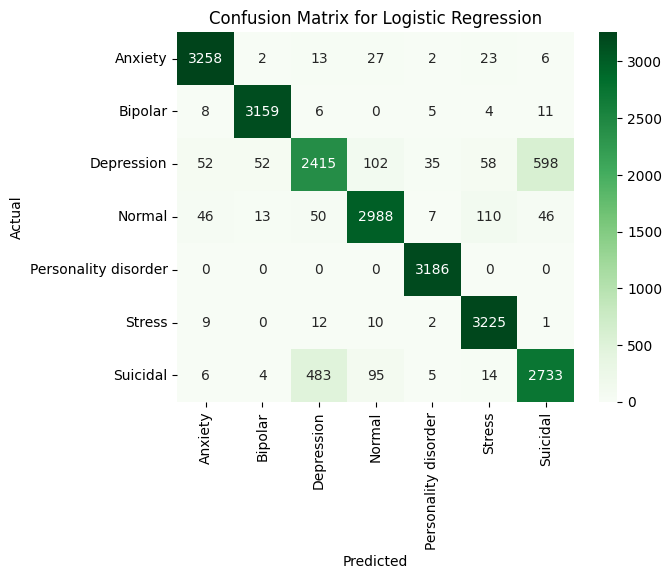

In [ ]:
accuracy_lr = accuracy_score(y_test, ypred_lr)
accuracy_scores.append(accuracy_lr)
classifiers.append("Logistic Regression")
print("\n")
print("Logistic Regression")
print("Accuracy:", accuracy_lr)

labels = lbl_enc.classes_
conf_matrix = confusion_matrix(y_test, ypred_lr)
print(classification_report(y_test, ypred_lr, target_names=labels))

# Plot the confusion matrix using a heatmap
# Annotate each cell with the numeric value of the confusion matrix
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')  # Label for x-axis
plt.ylabel('Actual')     # Label for y-axis
plt.title(f'Confusion Matrix for Logistic Regression')  # Title for the heatmap
plt.show()  # Display the heatmap

AUC Score: Logistic Regression

AUC for Anxiety: 1.00
AUC for Bipolar: 1.00
AUC for Depression: 0.96
AUC for Normal: 0.99
AUC for Personality disorder: 1.00
AUC for Stress: 1.00
AUC for Suicidal: 0.97
Macro-average AUC: 0.99




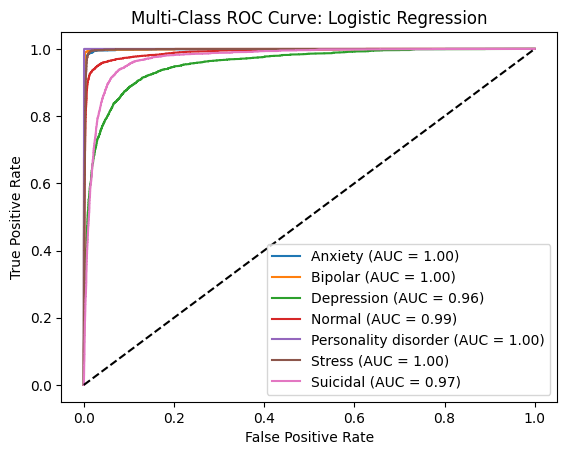

In [ ]:
print("AUC Score: Logistic Regression\n")
# Binarize the target
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Adjust based on the number of classes

# Get predicted probabilities
y_pred_prob = lr.predict_proba(x_test_tfidf)  # Adjust for your model

# Calculate AUC for each class
auc_scores = []
for i in range(y_test_bin.shape[1]):
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_scores.append(auc)
    print(f"AUC for {labels[i]}: {auc:.2f}")

# Macro-average AUC
macro_auc = np.mean(auc_scores)
print(f"Macro-average AUC: {macro_auc:.2f}")

print("\n")
# Plot ROC curves for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {auc_scores[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve: Logistic Regression")
plt.legend()
plt.show()

-------
**4.1.2. Random Forest**
>
Model Evaluation & Inference:
  - f1-score
  - Confusion Matrix
  - AUC-ROC

-------





Random Forest
Accuracy: 0.9539792841221975
                      precision    recall  f1-score   support

             Anxiety       0.98      0.99      0.99      3331
             Bipolar       0.99      1.00      0.99      3193
          Depression       0.92      0.85      0.88      3312
              Normal       0.93      0.94      0.93      3260
Personality disorder       1.00      1.00      1.00      3186
              Stress       0.96      1.00      0.98      3259
            Suicidal       0.90      0.91      0.90      3340

            accuracy                           0.95     22881
           macro avg       0.95      0.95      0.95     22881
        weighted avg       0.95      0.95      0.95     22881



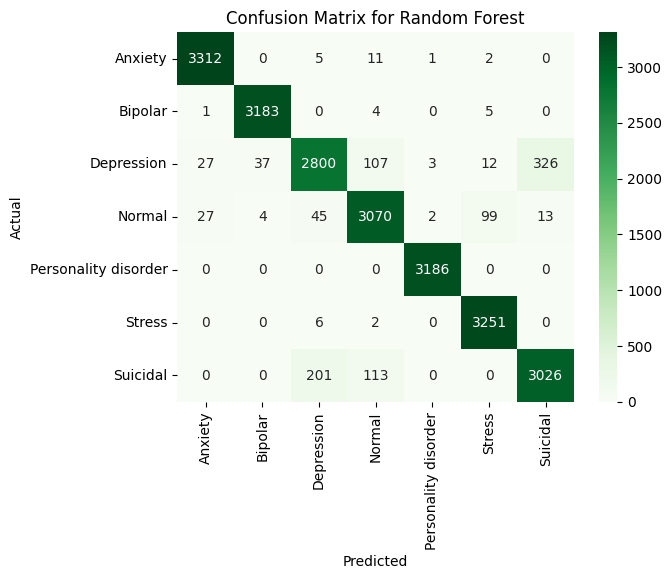

In [ ]:
accuracy_rf = accuracy_score(y_test, ypred_rf)
accuracy_scores.append(accuracy_rf)
classifiers.append("Random Forest")
print("\n")
print("Random Forest")
print("Accuracy:", accuracy_rf)

conf_matrix_rf = confusion_matrix(y_test, ypred_rf)
print(classification_report(y_test, ypred_rf, target_names=labels))

# Plot the confusion matrix using a heatmap
# Annotate each cell with the numeric value of the confusion matrix
sn.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')  # Label for x-axis
plt.ylabel('Actual')     # Label for y-axis
plt.title(f'Confusion Matrix for Random Forest')  # Title for the heatmap
plt.show()  # Display the heatmap

AUC Score: Random Forest

AUC for Anxiety: 1.00
AUC for Bipolar: 1.00
AUC for Depression: 0.99
AUC for Normal: 1.00
AUC for Personality disorder: 1.00
AUC for Stress: 1.00
AUC for Suicidal: 0.99
Macro-average AUC: 1.00




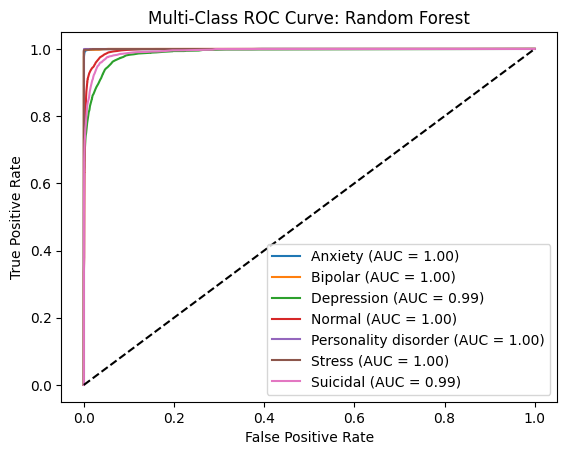

In [ ]:
print("AUC Score: Random Forest\n")
# Binarize the target
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])  # Adjust based on the number of classes

# Get predicted probabilities
y_pred_prob = rf.predict_proba(x_test_tfidf)

# Calculate AUC for each class
auc_scores = []
for i in range(y_test_bin.shape[1]):
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_scores.append(auc)
    print(f"AUC for {labels[i]}: {auc:.2f}")

# Macro-average AUC
macro_auc = np.mean(auc_scores)
print(f"Macro-average AUC: {macro_auc:.2f}")

print("\n")
# Plot ROC curves for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {auc_scores[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve: Random Forest")
plt.legend()
plt.show()

-------
**4.1.3. Neural Net**
>
Model Evaluation & Inference:
  - f1-score
  - Confusion Matrix
  - AUC-ROC

-------





Neural Net
Accuracy: 0.9326515449499585
                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3331
             Bipolar       0.98      0.99      0.98      3193
          Depression       0.84      0.82      0.83      3312
              Normal       0.94      0.90      0.92      3260
Personality disorder       0.99      1.00      0.99      3186
              Stress       0.96      0.99      0.97      3259
            Suicidal       0.86      0.85      0.86      3340

            accuracy                           0.93     22881
           macro avg       0.93      0.93      0.93     22881
        weighted avg       0.93      0.93      0.93     22881



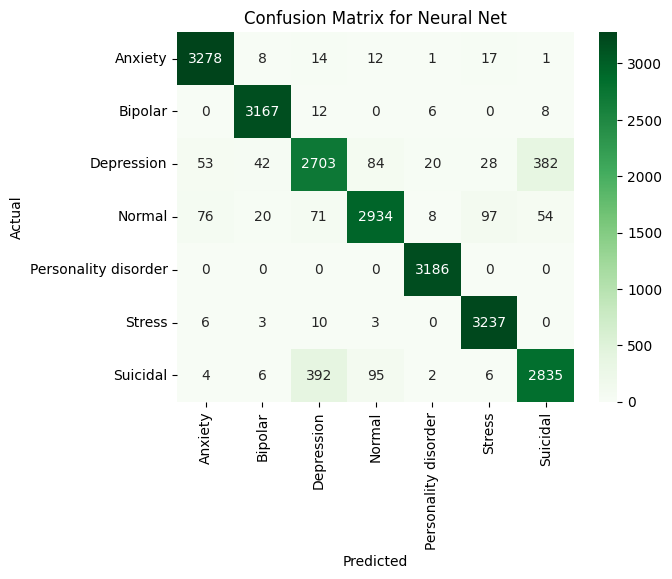

In [ ]:
accuracy_nn = accuracy_score(y_test, ypred_nn.argmax(axis=1))
accuracy_scores.append(accuracy_nn)
classifiers.append("Neural Net")
print("\n")
print("Neural Net")
print("Accuracy:", accuracy_nn)

conf_matrix_nn = confusion_matrix(y_test, ypred_nn.argmax(axis=1))
print(classification_report(y_test, ypred_nn.argmax(axis=1), target_names=labels))

# Plot the confusion matrix using a heatmap
# Annotate each cell with the numeric value of the confusion matrix
sn.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')  # Label for x-axis
plt.ylabel('Actual')     # Label for y-axis
plt.title(f'Confusion Matrix for Neural Net')  # Title for the heatmap
plt.show()  # Display the heatmap

AUC Score: Neural Net

716/716 [==============================] - 1s 2ms/step
AUC for Anxiety: 1.00
AUC for Bipolar: 1.00
AUC for Depression: 0.97
AUC for Normal: 0.99
AUC for Personality disorder: 1.00
AUC for Stress: 1.00
AUC for Suicidal: 0.98
Macro-average AUC: 0.99




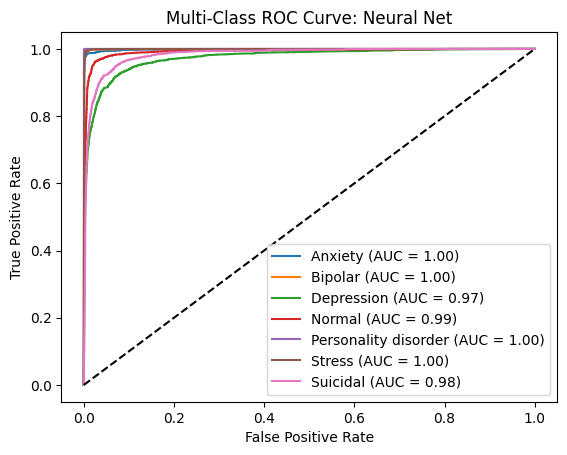

In [ ]:
print("AUC Score: Neural Net\n")
# Binarize the target
y_test_bin = label_binarize(y_test, classes=range(len(lbl_encoder.classes_)))  # Adjust based on the number of classes

# Get predicted probabilities
y_pred_prob = nn.predict(x_test_tfidf_dense)

# Calculate AUC for each class
auc_scores = []
for i in range(y_test_bin.shape[1]):
    auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    auc_scores.append(auc)
    print(f"AUC for {labels[i]}: {auc:.2f}")

# Macro-average AUC
macro_auc = np.mean(auc_scores)
print(f"Macro-average AUC: {macro_auc:.2f}")

print("\n")
# Plot ROC curves for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC = {auc_scores[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve: Neural Net")
plt.legend()
plt.show()

-------

*Explanation:*
>
**Model Evaluation:**
>
1. Logistic Regression 🔄
  - Training: The Logistic Regression Classifier (lr) is trained on the x_train_tfidf and y_train datasets.
  - Predictions:
    - Test Set: Predictions are made on the test data (x_test_tfidf) resulting in ypred.
    - Train Set: Predictions are made on the train data (x_train_tfidf) resulting in ytr_pred.
  - Evaluation Metrics 📏:
    - Accuracy:
      - Test Accuracy: 91.62% 📈
      - Train Accuracy: 95.38% 📈
    - Precision:
      - Test Precision: 91.44% 🎯
      - Train Precision: 95.33% 🎯

2. Random Forest Classifier 🌳
  - Training: The Random Forest Classifier (rf) is trained on the x_train_tfidf and y_train datasets.
  - Predictions:
    - Test Set: Predictions are made on the test data (x_test_tfidf) resulting in ypred.
    - Train Set: Predictions are made on the train data (x_train_tfidf) resulting in ytr_pred.
  - Evaluation Metrics 📏:
    - Accuracy:
      - Test Accuracy: 95.38%
      - Train Accuracy: 99.98%
    - Precision:
      - Test Precision: 95.36%
      - Train Precision: 99.98%

3. Neural Net 🚀
  - Training: The NeuralNet is trained on the x_train_tfidf and y_train datasets.
  - Predictions:
    - Test Set: Predictions are made on the test data (x_test_tfidf) resulting in ypred.
    - Train Set: Predictions are made on the train data (x_train_tfidf) resulting in ytr_pred.
  - Evaluation Metrics 📏:
    - Accuracy:
      - Test Accuracy: 93.7%
      - Train Accuracy: 98.6%
    - Precision:
      - Test Precision: 93.6%
      - Train Precision: 98.6%



-------


### 4.2 Model Inference

-------

*Explanation:*
>
The weights (coefficients) of the Logistic Regression model indicate how each feature impacts the target variable. Positive weights push the prediction toward a particular class, while negative weights push it away.

-------







Class: Anxiety
Top Positive Features:
       Feature     Weight
3515  restless  19.832562
376    anxieti  18.529775
385     anxiou  15.728506
4911     worri  15.138201
2895    nervou  13.068670
200   ampx200b   9.330987
822     cancer   8.962897
2065    infect   8.312883
1632     googl   7.798033
1799    health   7.642679

Top Negative Features:
        Feature     Weight
4620         ve -13.233489
1171        don -11.117009
3899     suicid  -9.802886
668     bipolar  -8.706122
823      cannot  -6.723415
2440  like shit  -6.597418
1699  happen in  -6.453959
516        avpd  -6.373037
3385       ptsd  -6.183771
1086       didn  -6.052642


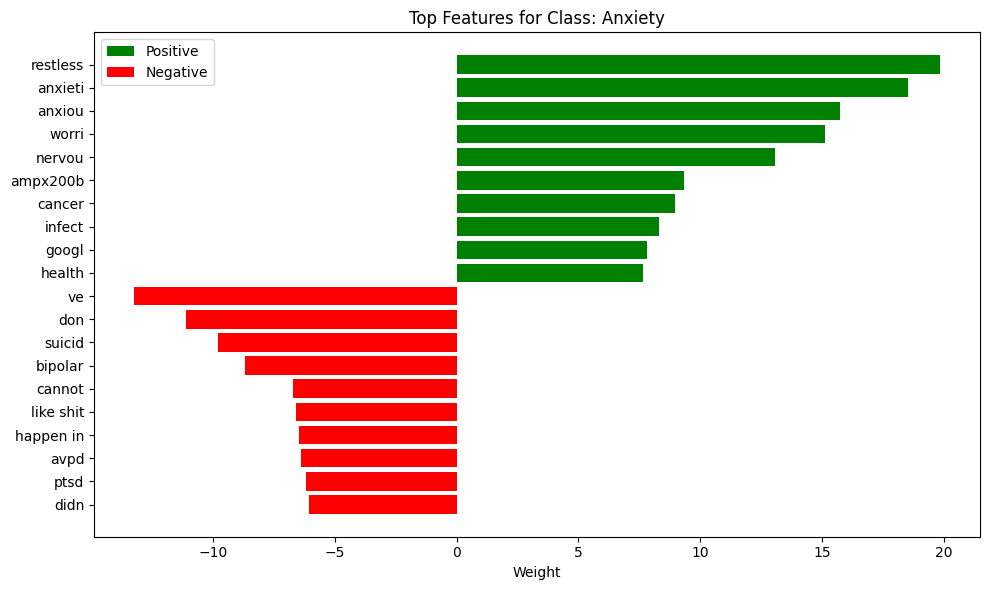


Class: Bipolar
Top Positive Features:
        Feature     Weight
668     bipolar  34.267721
2558      manic  23.041612
2557      mania  17.125914
1273     episod  14.840809
701          bp  13.310907
1916    hypoman  13.167794
3830      stabl  12.726708
1917  hypomania  11.806334
3627   seroquel  11.593347
2459    lithium  11.358220

Top Negative Features:
       Feature    Weight
516       avpd -7.770676
1143    do not -6.814858
3831     stage -6.663664
376    anxieti -6.346532
856      catch -6.183669
3869    stress -5.797677
1600      give -5.718824
325   and take -5.700289
4527      town -5.678298
2895    nervou -5.653854


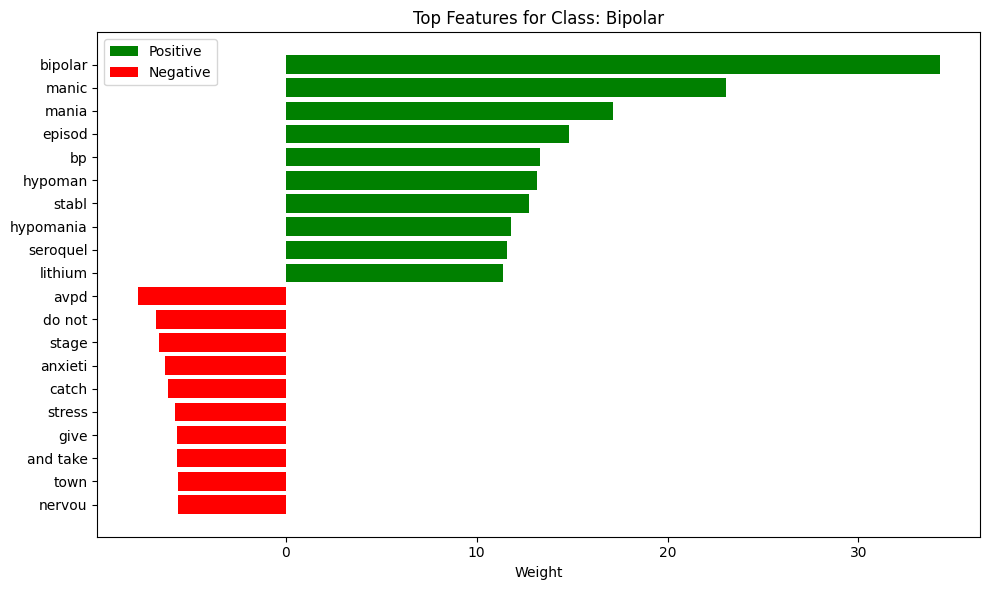


Class: Depression
Top Positive Features:
      Feature     Weight
1061  depress  21.634464
1171      don  17.808325
4620       ve  17.249071
1143   do not  11.802003
1086     didn  11.080741
3423       re  10.352837
2470       ll   8.740036
823    cannot   8.550201
1084  did not   7.119643
2878       na   6.820631

Top Negative Features:
        Feature     Weight
1087      didnt -10.421905
981     couldnt  -8.230355
4689      wasnt  -8.091930
830        cant  -7.284867
1175       dont  -7.275722
4196  they dont  -7.160715
2247        ive  -6.911107
2147       isnt  -6.740313
438       arent  -6.641735
3775  some kind  -6.390626


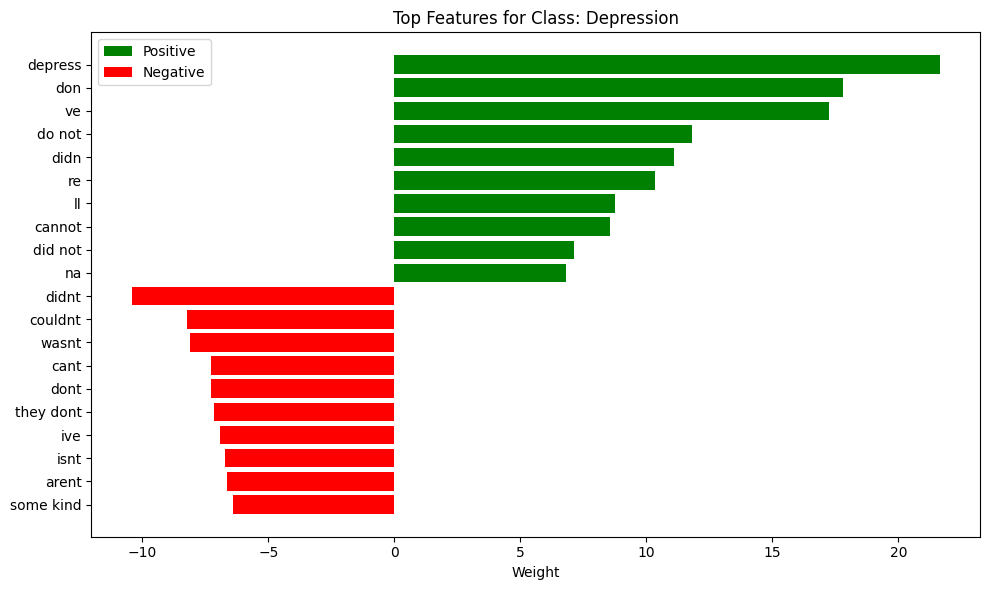


Class: Normal
Top Positive Features:
       Feature     Weight
1171       don  15.256209
4620        ve  12.979279
1086      didn   8.457577
3385      ptsd   7.584105
1869  homeless   6.088923
3011  occasion   5.200431
278   and live   5.105043
1418     field   4.576013
1687     hadnt   4.478845
2470        ll   4.445949

Top Negative Features:
       Feature     Weight
1061   depress -15.217137
4911     worri -11.853586
3515  restless -11.597542
3899    suicid  -9.373196
385     anxiou  -9.300775
2860    myself  -8.795722
823     cannot  -7.808414
200   ampx200b  -7.747695
376    anxieti  -7.722815
1381      feel  -7.719695


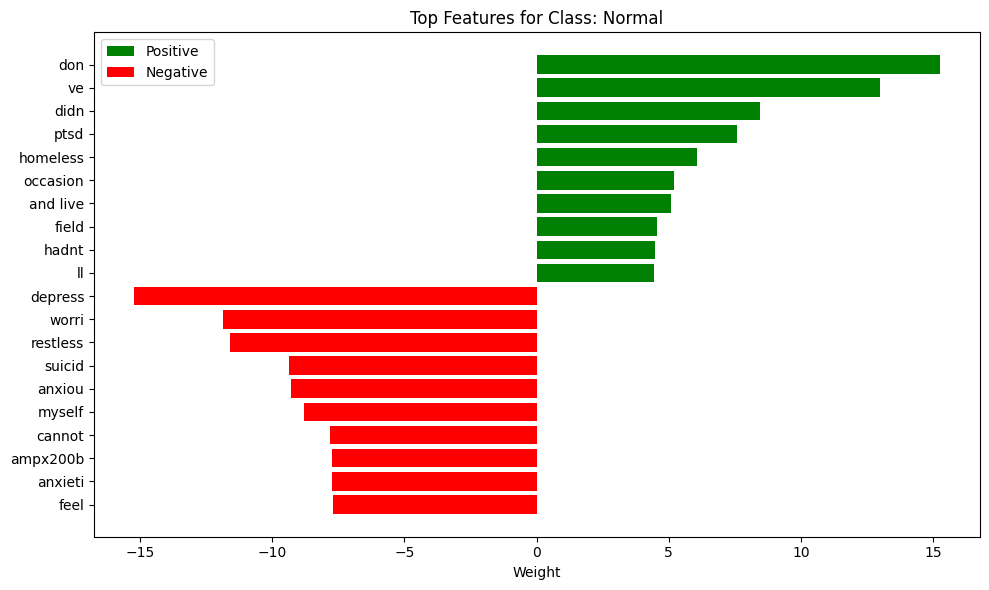


Class: Personality disorder
Top Positive Features:
         Feature     Weight
516         avpd  39.144727
515        avoid  18.352950
4630        view  12.948473
2080    interact   9.839401
4221  thi disord   9.737652
2757     my avpd   8.482093
3636       shame   8.185612
2148        isol   8.185593
3763      social   8.116136
4856   with avpd   7.900716

Top Negative Features:
         Feature    Weight
1143      do not -9.245657
668      bipolar -8.159517
376      anxieti -7.799723
3385        ptsd -6.921556
1061     depress -6.214684
1156     do when -6.033973
1834    here and -5.763486
3940  talk about -5.704135
3608     seem to -5.663774
1803     healthi -5.332661


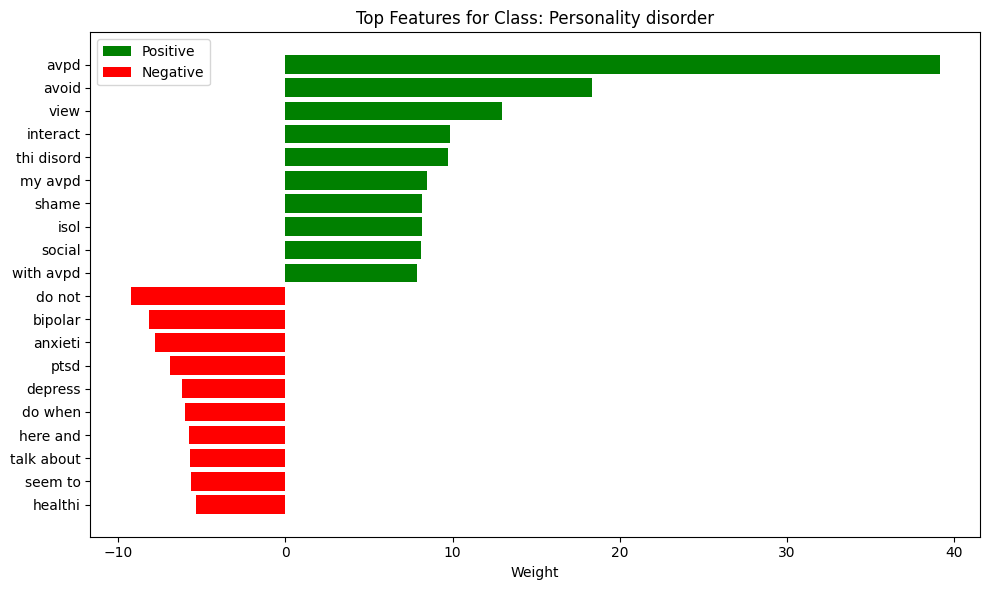


Class: Stress
Top Positive Features:
             Feature     Weight
3869          stress  20.928745
4345            tldr  16.358798
3385            ptsd  11.434881
59              abus   8.168652
1972        im alway   7.895249
3200        out what   7.737677
410       anyth that   7.056087
2996          now it   6.847450
380   anxieti disord   6.770714
1005          critic   6.305429

Top Negative Features:
         Feature     Weight
516         avpd -10.736785
668      bipolar  -9.905512
4620          ve  -8.907390
1171         don  -7.856899
1273      episod  -7.398630
1061     depress  -7.104201
3339     potenti  -6.943369
1951      if the  -6.774808
4782  when think  -6.748941
2558       manic  -6.697084


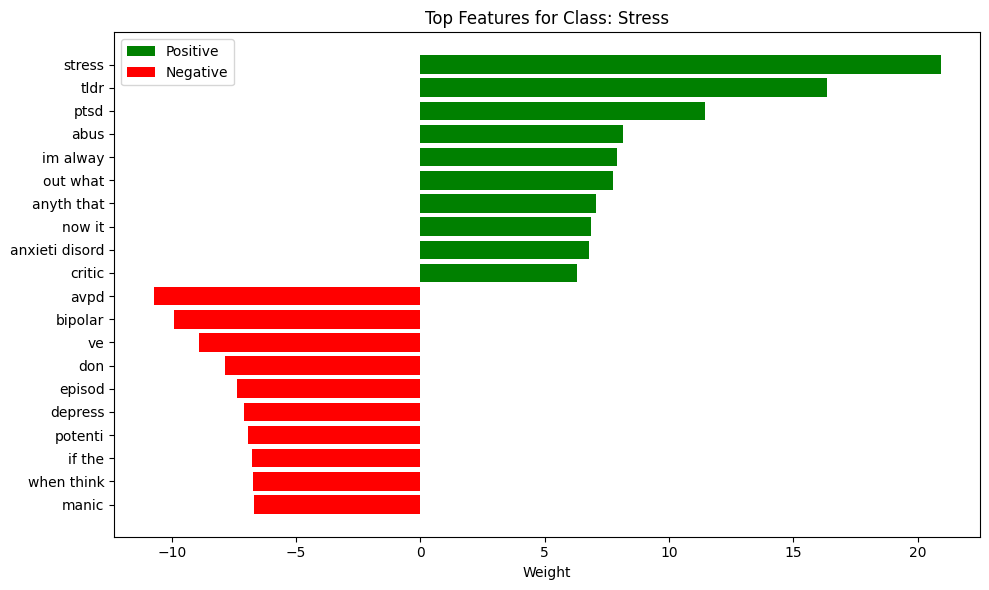


Class: Suicidal
Top Positive Features:
          Feature     Weight
1143       do not  15.128508
3899       suicid  14.608879
823        cannot  10.793510
1659          gun   8.284498
1780     he didnt   7.260823
2668       method   7.239342
1094          die   6.957300
3215      overdos   6.829535
2325  kill myself   6.714217
1631       goodby   6.691022

Top Negative Features:
     Feature     Weight
1968      im -15.625381
2247     ive -11.877197
2878      na  -9.413713
4892    wont  -9.326678
1167  doesnt  -9.218198
830     cant  -9.090362
1175    dont  -7.844309
4689   wasnt  -7.253502
1158  do you  -7.091806
1087   didnt  -6.839422


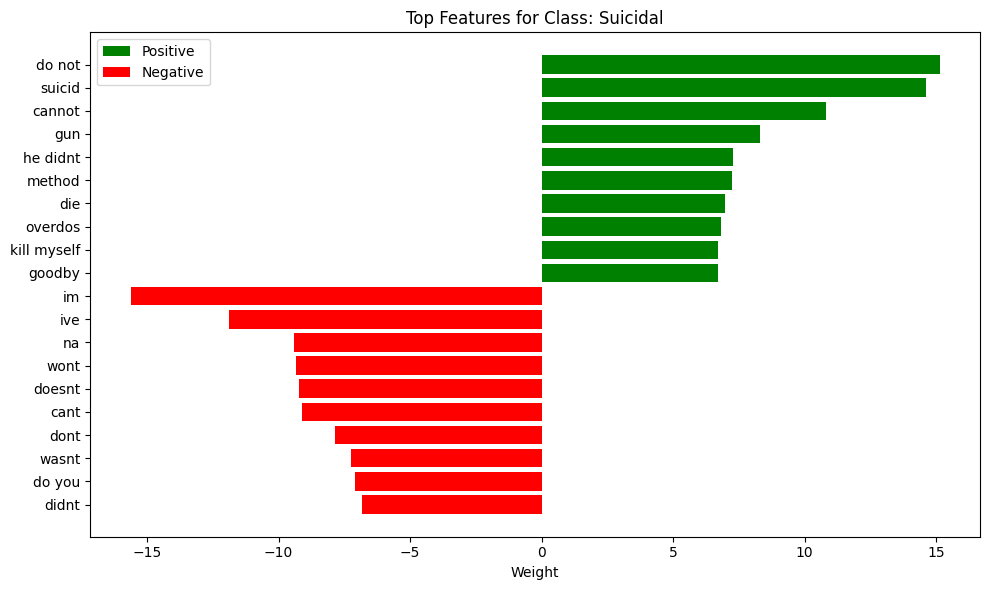

In [ ]:
# Get the feature names from TF-IDF vectorizer
feature_names = vec.get_feature_names_out()

# Get the coefficients of the Logistic Regression model
coefficients = lr.coef_

# Iterate through each class and display top positive and negative weights
for class_index, class_label in enumerate(lbl_encoder.classes_):
    print(f"\nClass: {class_label}")

    # Get the coefficients for the current class
    class_coefficients = coefficients[class_index]

    # Create a DataFrame for feature names and their corresponding coefficients
    weights_df = pd.DataFrame({
        'Feature': feature_names,
        'Weight': class_coefficients
    })

    # Sort by weight to get top positive and negative features
    top_positive = weights_df.sort_values(by='Weight', ascending=False).head(10)
    top_negative = weights_df.sort_values(by='Weight').head(10)

    print("Top Positive Features:")
    print(top_positive)

    print("\nTop Negative Features:")
    print(top_negative)

    # Plot the top positive and negative features
    plt.figure(figsize=(10, 6))
    plt.barh(top_positive['Feature'], top_positive['Weight'], color='green', label="Positive")
    plt.barh(top_negative['Feature'], top_negative['Weight'], color='red', label="Negative")
    plt.xlabel("Weight")
    plt.title(f"Top Features for Class: {class_label}")
    plt.gca().invert_yaxis()
    plt.legend()
    plt.tight_layout()
    plt.show()


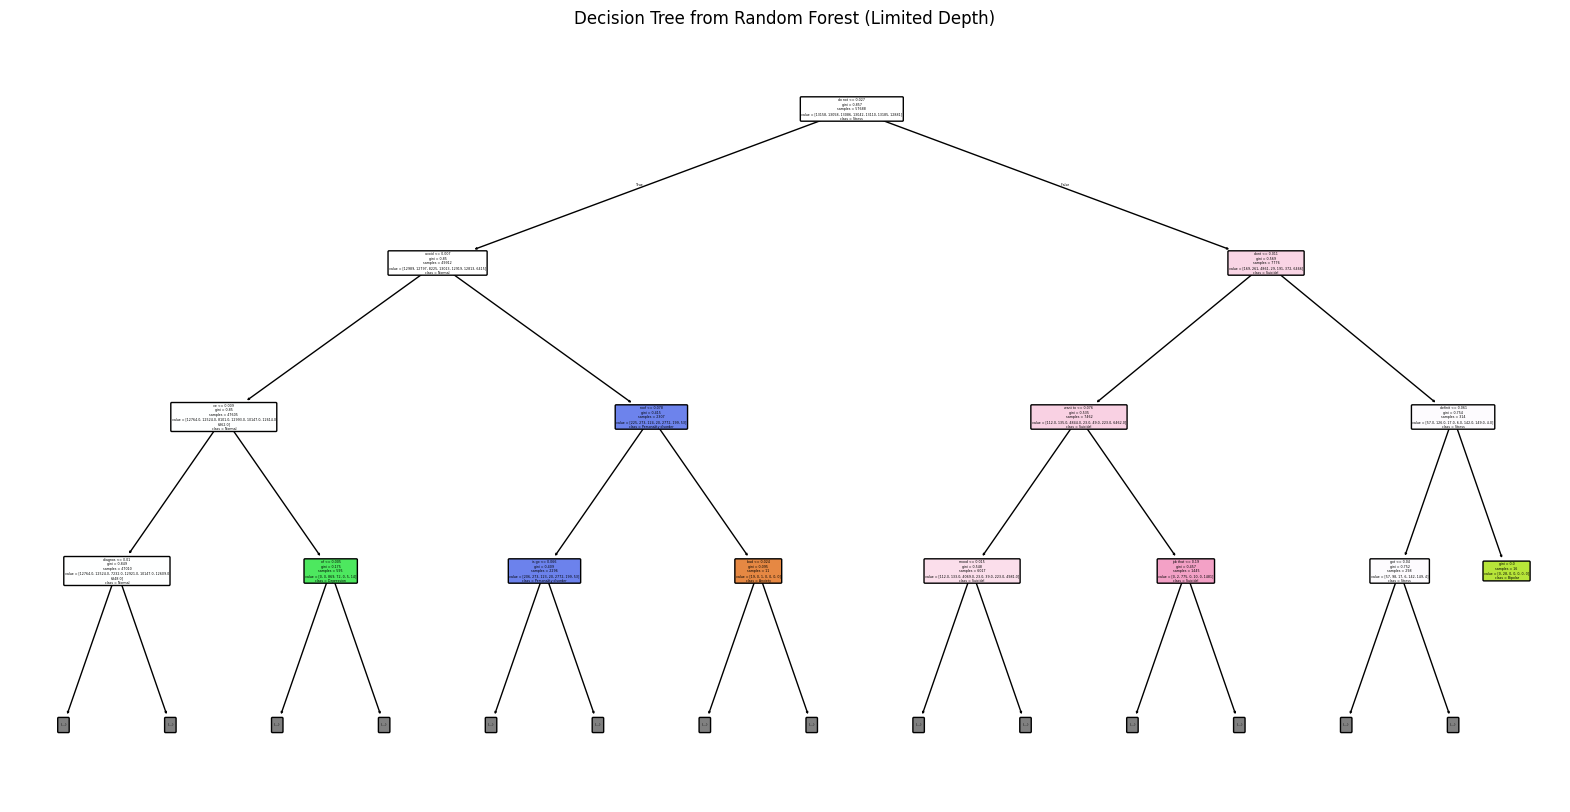

In [ ]:
from sklearn.tree import plot_tree

# Select a single tree from the Random Forest
single_tree = rf.estimators_[0]

# Plot the tree with a limited max depth
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree,
    feature_names=vec.get_feature_names_out(),
    class_names=lbl_encoder.classes_,
    filled=True,
    rounded=True,
    max_depth=3  # Limit to 3 levels for clarity
)
plt.title("Decision Tree from Random Forest (Limited Depth)")
plt.show()




-------

*Explanation:*
>
For very large trees, visualization may still be impractical. In this case, we can extract the rules from the tree as text. This is simpler and still gives us insights into how the tree splits the data.

-------




In [ ]:
from sklearn.tree import export_text

# Export rules for a single tree
tree_rules = export_text(single_tree, feature_names=vec.get_feature_names_out())
print(tree_rules)


|--- do not <= 0.03
|   |--- avoid <= 0.01
|   |   |--- ve <= 0.01
|   |   |   |--- diagnos <= 0.01
|   |   |   |   |--- just <= 0.00
|   |   |   |   |   |--- kill myself <= 0.01
|   |   |   |   |   |   |--- find <= 0.01
|   |   |   |   |   |   |   |--- how <= 0.01
|   |   |   |   |   |   |   |   |--- when <= 0.01
|   |   |   |   |   |   |   |   |   |--- with <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- if <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 511
|   |   |   |   |   |   |   |   |   |   |--- if >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 64
|   |   |   |   |   |   |   |   |   |--- with >  0.01
|   |   |   |   |   |   |   |   |   |   |--- friend with <= 0.11
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 96
|   |   |   |   |   |   |   |   |   |   |--- friend with >  0.11
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   | 

-------

*Explanation:*
>
**💡 SHAP Values**
  - To provide insights into how individual features contribute to a model's predictions, we calculate SHAP Values
  - SHAP Values will calculate importance value to each feature for a specific prediction

-------




In [ ]:
explainer = shap.LinearExplainer(lr, x_train_tfidf[:1000])
shap_values = explainer.shap_values(x_test_tfidf[:1000])


Top 10 Feature importance for Anxiety:
restless: 0.3857
anxieti: 0.3327
im: 0.2186
worri: 0.1819
to: 0.1540
not: 0.1333
depress: 0.1220
stress: 0.1202
feel: 0.1173
about: 0.1105


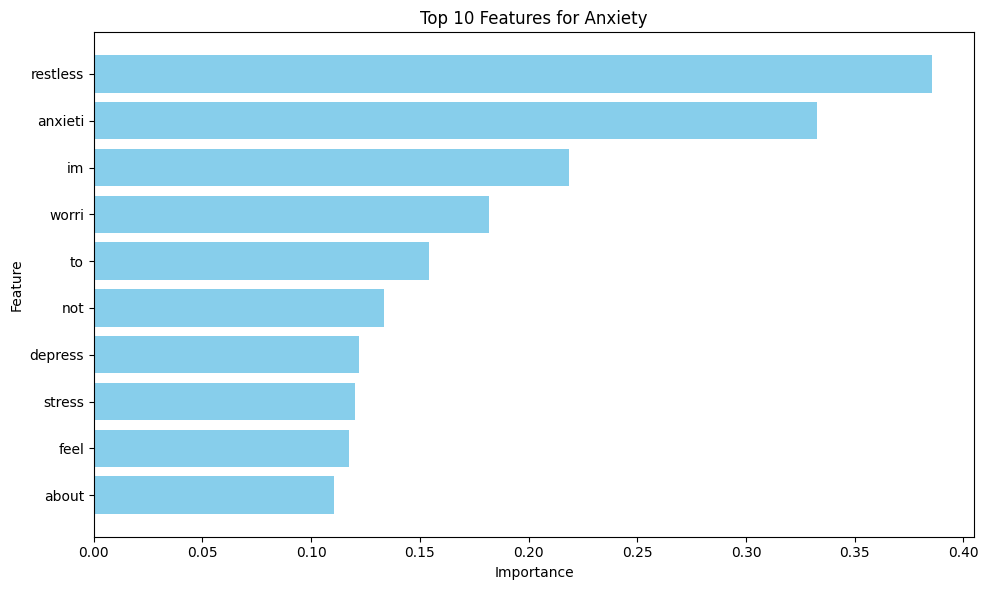


Top 10 Feature importance for Bipolar:
bipolar: 0.3221
im: 0.3129
depress: 0.2430
episod: 0.2274
the: 0.1587
manic: 0.1508
stress: 0.1502
cant: 0.1486
do not: 0.1450
not: 0.1435


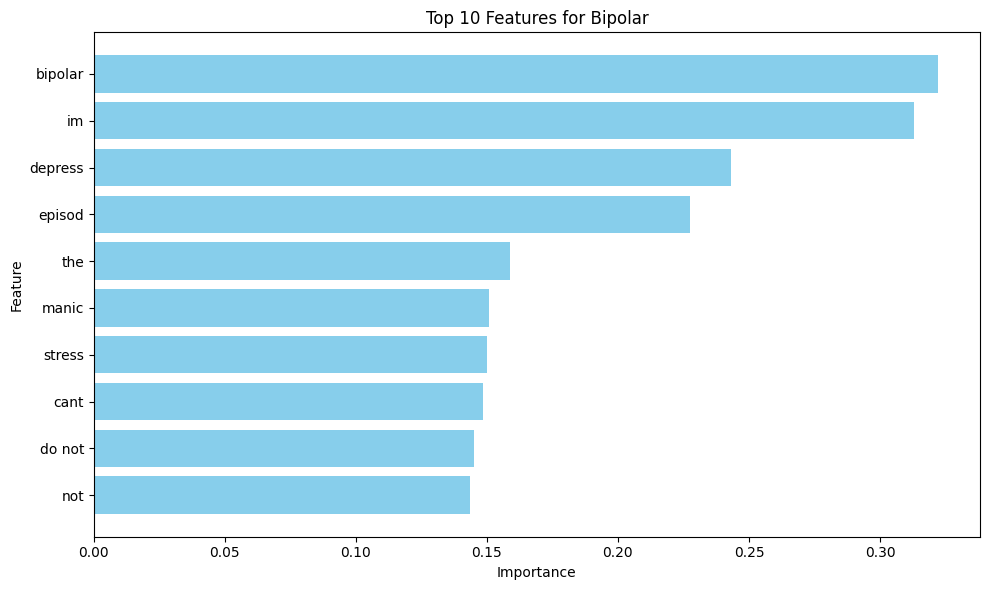


Top 10 Feature importance for Depression:
depress: 0.5534
do not: 0.2512
not: 0.2245
im: 0.2190
am: 0.2163
dont: 0.1717
ive: 0.1578
cant: 0.1533
ve: 0.1299
cannot: 0.1139


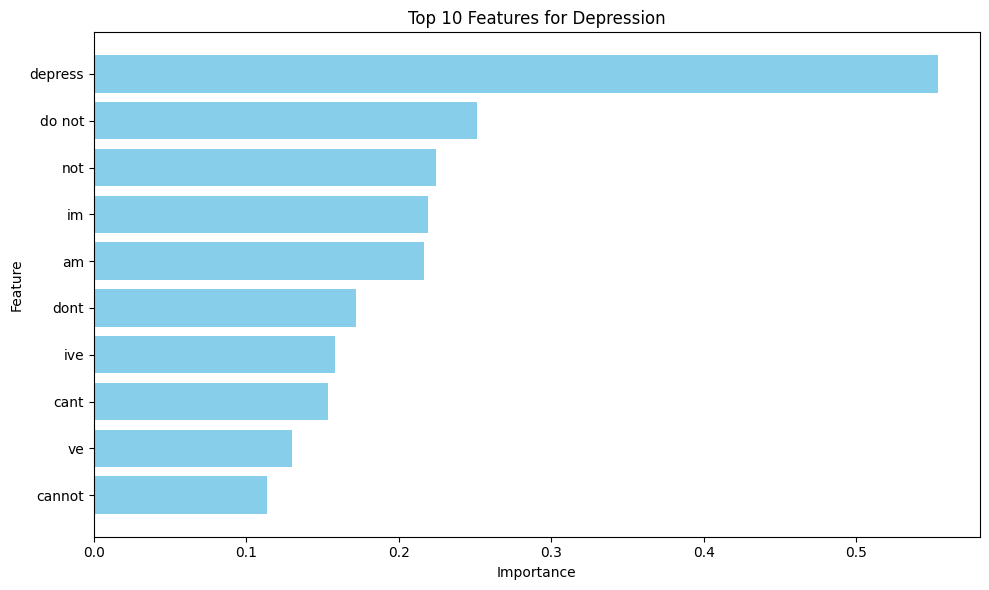


Top 10 Feature importance for Normal:
depress: 0.3892
feel: 0.2639
restless: 0.2255
am: 0.2146
me: 0.2080
and: 0.1652
myself: 0.1577
anyon: 0.1471
worri: 0.1425
just: 0.1408


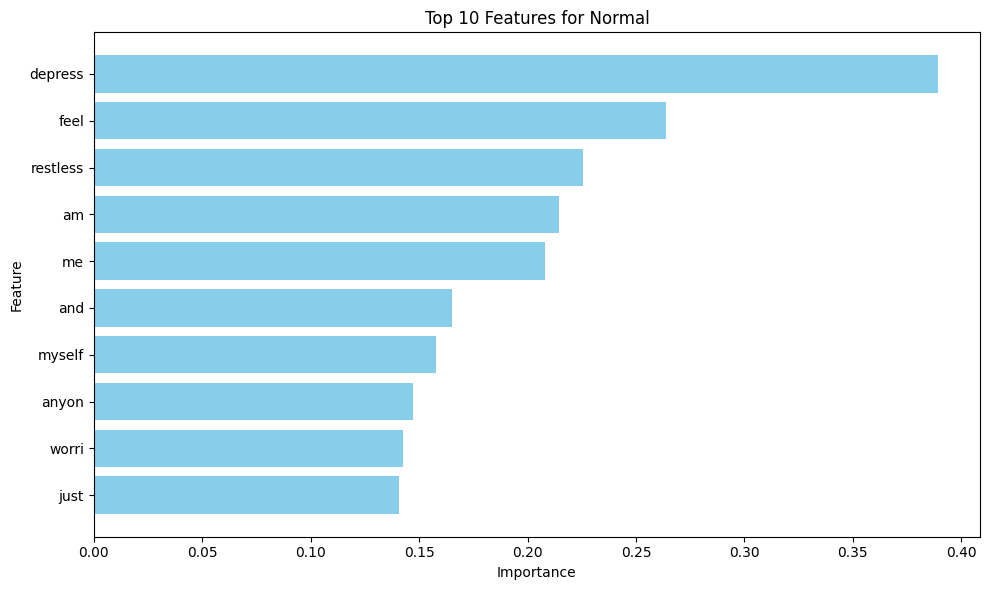


Top 10 Feature importance for Personality disorder:
avpd: 0.2661
im: 0.2127
do not: 0.1968
avoid: 0.1924
depress: 0.1589
but: 0.1480
am: 0.1471
dont: 0.1470
anxieti: 0.1400
cant: 0.1370


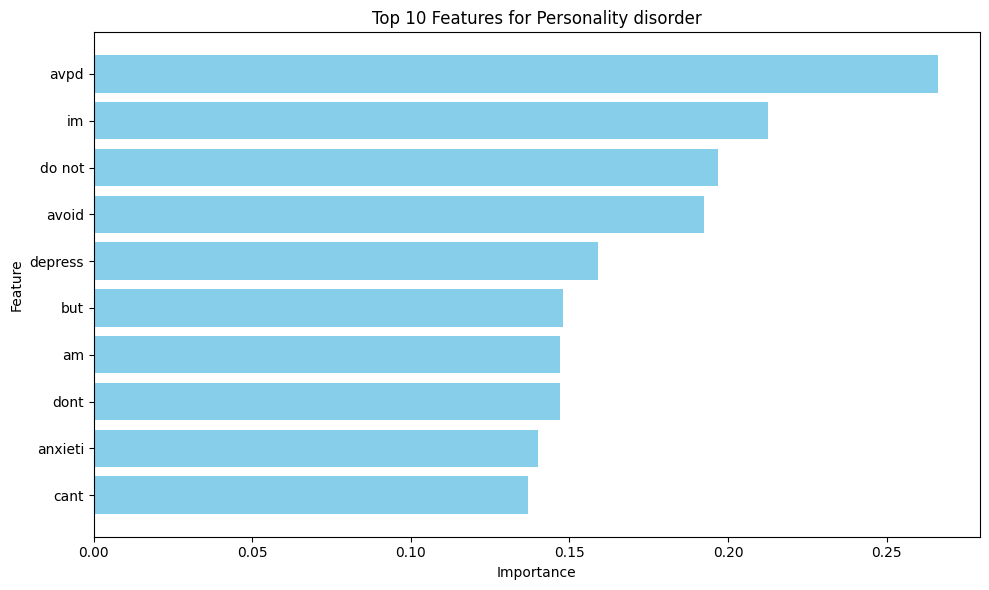


Top 10 Feature importance for Stress:
stress: 0.5421
depress: 0.1816
and: 0.1511
ive: 0.1362
im: 0.1342
not: 0.1248
it: 0.1162
becaus: 0.1137
episod: 0.1134
is: 0.1097


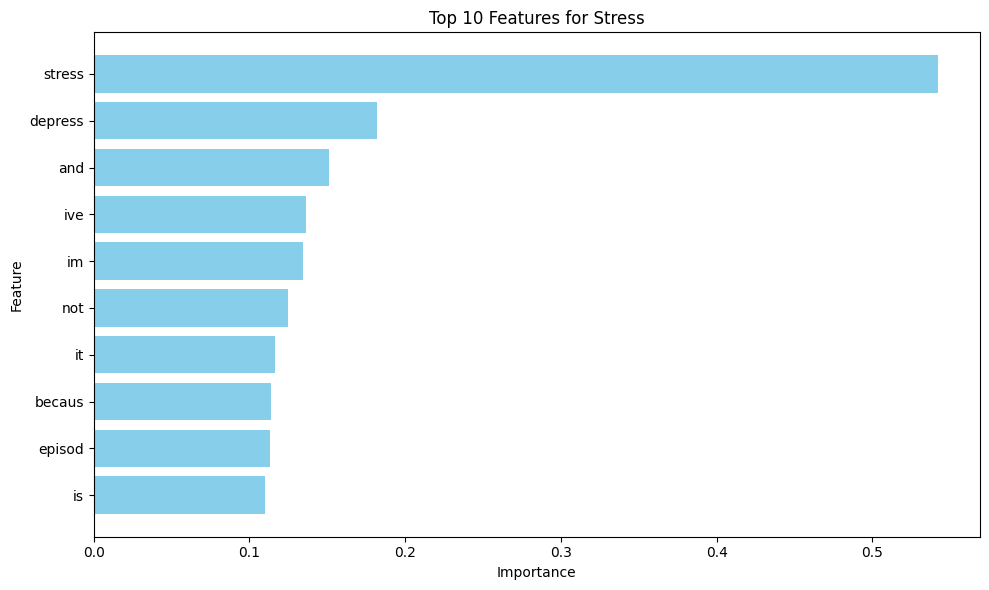


Top 10 Feature importance for Suicidal:
im: 0.6048
do not: 0.3221
ive: 0.2711
am: 0.2574
cant: 0.1913
dont: 0.1851
not: 0.1710
to: 0.1589
cannot: 0.1438
want: 0.1312


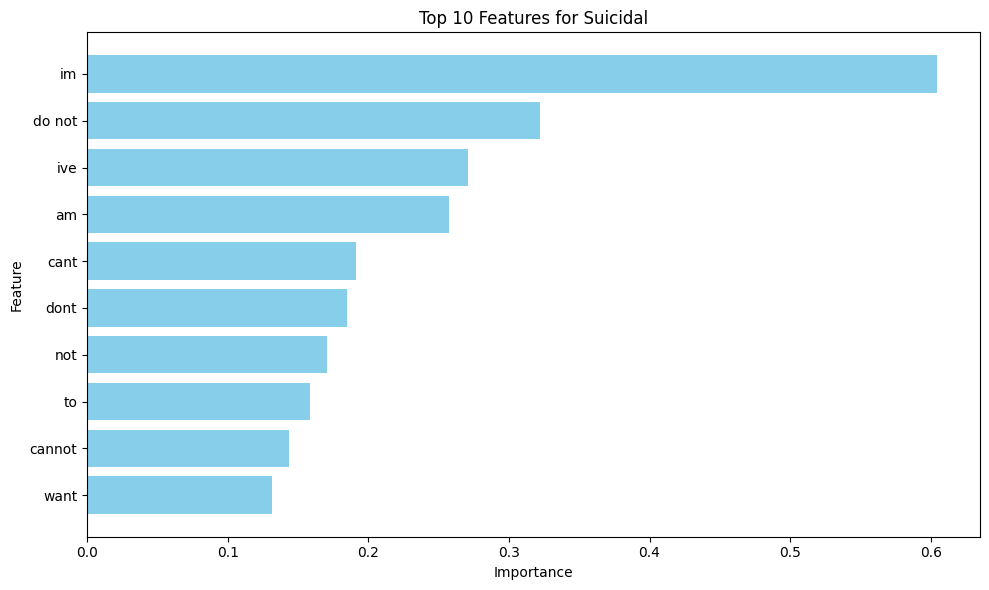

In [ ]:
class_feature_importance = {}

# Iterate over each class
for class_index in range(shap_values.shape[2]):  # n_classes
    # Aggregate feature importance for this class
    feature_importance = np.abs(shap_values[:, :, class_index]).mean(axis=0)  # Mean across all samples
    class_feature_importance[f"{labels[class_index]}"] = feature_importance

# Assuming you have feature names (e.g., from TfidfVectorizer)
feature_names = vec.get_feature_names_out()

# Print feature importance with feature names
for class_label, importance in class_feature_importance.items():
    print(f"\nTop 10 Feature importance for {class_label}:")
    top_features = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:10]

    # Print the top 10 features
    for feature, value in top_features:
        print(f"{feature}: {value:.4f}")

    top_features_df = pd.DataFrame(top_features, columns=["Feature", "Importance"])

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top_features_df["Feature"], top_features_df["Importance"], color='skyblue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Top 10 Features for {class_label}")
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
    plt.tight_layout()
    plt.show()

-------

*Explanation:*
>
**💾 Model and Vectorizer Saving**
  - Vectorizer Saving: The fitted TfidfVectorizer (vec) is saved as vectorizer.pkl.
  - Model Saving: The trained Random Forest Classifier (rf) is saved as model.pkl.

-------




In [ ]:
j.dump(vec,'vectorizer.pkl')
j.dump(rf,'model_rf.pkl')

vector=j.load('vectorizer.pkl')
model=j.load('model_rf.pkl')

-------

*Explanation:*
>
**🔍 Model Prediction**
- Loading the Vectorizer and Model 💾
  - Vectorizer: The previously saved TfidfVectorizer (vecctorizer.pkl) is loaded.
  - Model: The trained Random Forest Classifier model (model.pkl) is loaded.
- Text Preprocessing 🛠️
  - Text Cleaning: A preprocessing function is defined to clean the input text by:
    - Removing non-alphanumeric characters.
    - Converting text to lowercase.
    - Applying stemming to reduce words to their root form using PorterStemmer.
- Prediction Function 🔄
  - Text Vectorization: The input text is transformed into a TF-IDF vector using the loaded vectorizer.
  - Prediction: The transformed text vector is passed to the loaded model to predict the sentiment status.
- Example Predictions 📝
  - Input Text: "trouble sleeping, confused mind, restless heart. All out of tune"
  - Preprocessed Text: "troubl sleep confus mind rest heart all out of tune"
  - Predicted Status: Anxiety 😟

-------




¶



In [ ]:
pt=PorterStemmer()
def preprocessing(x):
    l=[]

    text=re.sub('[^a-zA-Z0-9\s]','',x.lower())
    for i in text.split():
        l.append(pt.stem(i.lower()))

    return " ".join(l)

In [ ]:
x_test_csv = x_test.reset_index(drop=True)
pd.concat([x_test_csv, pd.Series(labels[y_test])], axis=1).to_csv('x_test.csv', index=False)  # Save to CSV

In [ ]:
text="im so nervous what wrong"
text=preprocessing(text)

In [ ]:
def predi(x):
    vec=vector.transform([text])
    result=model.predict(vec)[0]

    return result

labels[predi(text)]

'Anxiety'

# 5. Conclusion

<ipython-input-44-aea1f845258f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Classifier', y='Accuracy', data=accuracies_df, palette=palette)


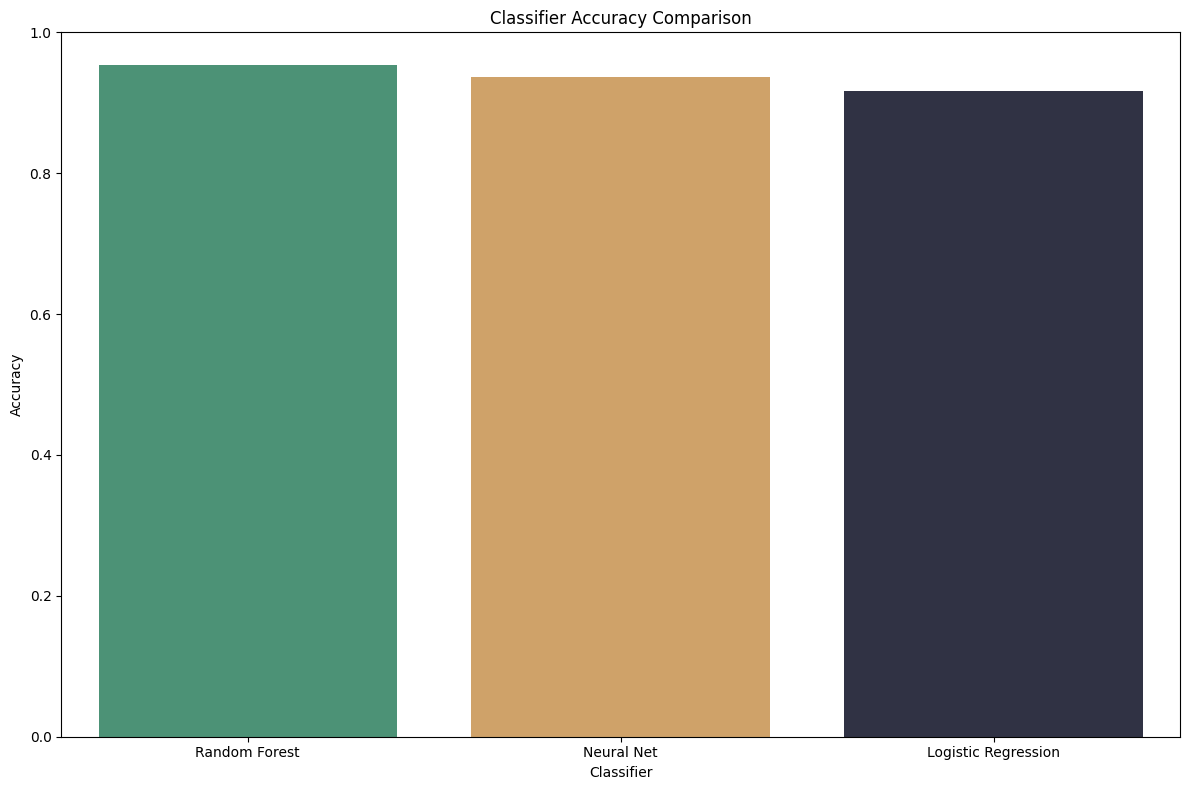

In [ ]:
# Create a DataFrame to store classifier names and their corresponding accuracy scores
accuracies_df = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accuracy_scores}).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(12, 8))
palette = dict(zip(accuracies_df['Classifier'], colors[:4]))

# Create a bar plot to visualize the accuracy of each classifier
sn.barplot(x='Classifier', y='Accuracy', data=accuracies_df, palette=palette)

plt.title("Classifier Accuracy Comparison")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

--------

**Conclusion:**
>
- In this project, various machine learning techniques are applied to classify text data related to mental health issues. By leveraging different models and evaluating their performance, we aim to gain insights into mental health sentiments and potentially improve support mechanisms for affected individuals.

- Preprocessing:
	- TF-IDF vectorizer shows Effective text preprocessing and feature extraction and shows excellent result in achieving high accuracy.
	- We also enhance the previous works by addresing class imbalance, that eventually shows increasing in accuracy scores

- In our project, We enhance the previous works by experimenting with ensemble model like random forest and also neural net. We evaluated 3 models designed to handle large datasets with numerous features: Logistic Regression, Random Forest, and Neural Net. Random Forest emerged as the top performer with an accuracy of 95%. The classification report showed that the Bipolar and Personality Disorder state was the easiest to distinguish with an F1 score of 93, followed by Anxiety and Bipolar with F1 scores. Other states also performed well, with F1 scores above 90 (Anxiety, Stress, and Normal. Although the Confusion Matrix revealed some overlap between depression and suicidal messages, Random Forest still outperformed the other models and demonstrated superior overall performance.

- Interpretability: SHAP values and AUC-ROC curves helped us understand the model’s behavior and its strengths in distinguishing between different mental health statuses.

- From the simulation, we conclude that this model can be a valuable and practical tool in identifying mental health issues based on text input. Integrating this model into a real-time application can help in providing immediate support to individuals in need.
--------